# Proyecto 4 ¿Cuál te conviene Surf o Ultimate?
Eres analista de la empresa de comunicaciones Megaline, y tienes como objetivo determinar cuál de los planes que emplea la empresa genera más ingresos.

##  Inicialización
Se realiza la carga de las librerias que se emplearan y de los datos

### Explorar datos iniciales

In [160]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np
from scipy import stats as st
import math as mt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import levene

In [2]:
# Cargar los archivos de datos en DataFrame

data_calls = pd.read_csv("/datasets/megaline_calls.csv") # df con la info de llamadas realizadas por usuario
data_internet = pd.read_csv("/datasets/megaline_internet.csv") #df con info de GB consumidos por usuario
data_message = pd.read_csv("/datasets/megaline_messages.csv") #df con info de los mensajes enviados por usuario
data_plan = pd.read_csv("/datasets/megaline_plans.csv") #df con la info de los planes
data_usuario = pd.read_csv("/datasets/megaline_users.csv") #df con la info general de cada usuario

1. La tabla usuario (datos sobre los usuarios):
- user_id — identificador único del usuario
- first_name — nombre del usuario
- last_name — apellido del usuario
- age — edad del usuario (en años)
- reg_date — fecha de suscripción (dd, mm, aa)
- churn_date — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- city — ciudad de residencia del usuario
- plan — nombre de la tarifa

2. La tabla calls (datos sobre las llamadas):
- id — identificador único de la llamada
- call_date — fecha de la llamada
- duration — duración de la llamada (en minutos)
- user_id — el identificador del usuario que realiza la llamada

3. La tabla messages (datos sobre los SMS):
- id — identificador único del SMS
- message_date — fecha del SMS
- user_id — el identificador del usuario que manda el SMS

4. La tabla internet (datos sobre las sesiones web):
- id — identificador único de la sesión
- mb_used — el volumen de datos gastados durante la sesión (en megabytes)
- session_date — fecha de la sesión web
- user_id — identificador del usuario

5. La tabla plan (datos sobre las tarifas):
- plan_name — nombre de la tarifa
- usd_monthly_pay — pago mensual en dólares estadounidenses
- minutes_included — minutos incluidos al mes
- messages_included — SMS incluidos al mes
- mb_per_month_included — datos incluidos al mes (en megabytes)
- usd_per_minute — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el - - operador cobrará el minuto 101)
- usd_per_message — precio por SMS tras exceder los límites del paquete
- usd_per_gb — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

In [3]:
# Información general/resumida sobre el DataFrame
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
data_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
data_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Muestra de datos
data_usuario.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [10]:
data_message.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [11]:
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
data_plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen inicio! El read con la ruta correcta, el head, y el info!</div>

In [13]:
#Checar valores ausentes en el dataframe de usuario, puesto que fue donde se observó que hay diferencia en número de datos
data_usuario.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

De acuerdo a la información suministrada, solo en los datos contenidos en el DataFrame de usuarios se observan datos ausentes en la columna "churn_date" y esto se debe (según la información suministrada por el cliente) a que el servicio para la fecha de corte estaba activo, es decir solo 34 clientes se habían dado de baja en los planes contratados.

In [14]:
data_usuario[data_usuario["churn_date"].isna()] 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [15]:
#Cálculo del porcentaje de ausentes en la muestra de datos
porcentaje_ausentes = (data_usuario["churn_date"].size-data_usuario["churn_date"].count())/data_usuario["churn_date"].size
print(f"Porcentaje de datos ausentes en la data original:{porcentaje_ausentes:.0%}")

Porcentaje de datos ausentes en la data original:93%


Se procedera a realizar la imputación de los ausentes en la columna "churn_date" por la palabra Activo

In [16]:
#Imputación de datos ausentes
data_usuario["churn_date"].fillna("Activo", inplace = True)
data_usuario["churn_date"].isna().sum()

0

In [17]:
#Filtro para ver llamadas con tiempo de 0 min por usuario
data_calls.query('duration==0').pivot_table(index="user_id", values="duration", aggfunc="count")

,duration
user_id,
1001,59
1002,19
1003,31
1004,64
1005,9
...,...
1495,45
1496,37
1497,12


<AxesSubplot:xlabel='user_id'>

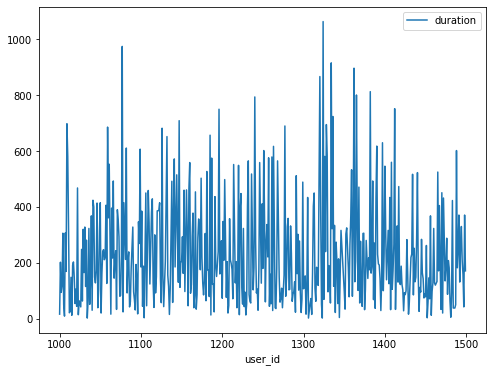

In [18]:
#gráfico con las llmadas mayor a 0 min
data_calls.query('duration > 0').pivot_table(index="user_id", values="duration", aggfunc="count").plot(figsize=(8,6))

<AxesSubplot:xlabel='user_id'>

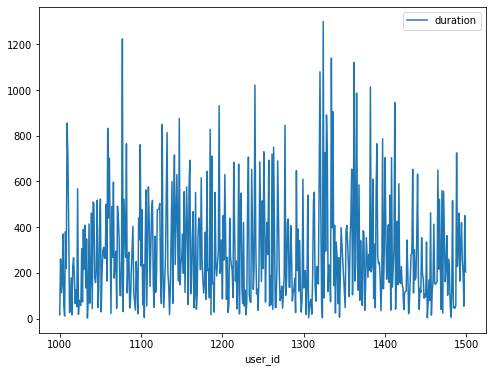

In [19]:
#gráfico con todas las llamadas, incluyendo las de 0 min
data_calls.pivot_table(index="user_id", values="duration", aggfunc="count").plot(figsize=(8,6))

In [20]:
#datos estadísticos
data_calls["duration"].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

<AxesSubplot:>

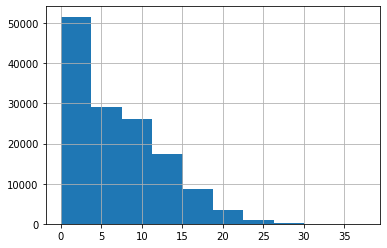

In [21]:
data_calls["duration"].hist()

In [22]:
data_calls.query('duration >0').describe()

,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

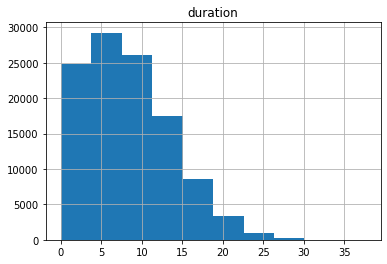

In [23]:
data_calls.query('duration >0').hist("duration")

En total hay 26834 (19%) registros con llamadas de 0 min, al observar el histograma con todos los datos se aprecia que hay un pico de mayor frecuencia en el valor 0, sin embargo, los datos se tienden a concentrar entre los 3 a 15 min, esto se aprecia mejor en el segundo histograma en donde se excluyen los datos con tiempos de duración de 0 min. Además hay que considerar que Megaline redondea los segundos a min, por lo que todos aquellos datos con tiempo mayor a 0 y menor a 1, se redondeará a 1 min.
Se puede asumir que esas llamadas con tiempo igual a 0, fueron llamadas realizadas pero que no fueron contestadas, por lo que realmente no entran en la consideración del plan ya que este solo contabiliza los minutos consumidos, es decir, aquellos mayor a 0, de allí que esto registros donde el tiempo igual a 0 pueden ser eliminados.

In [24]:
#Eliminar los datos de llamadas con tiempo de 0 minutos
data_calls.drop(data_calls[data_calls['duration']==0].index, inplace=True)

In [25]:
#información de la tabla llamadas sin los registros de 0 minutos
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110901 non-null  object 
 1   user_id    110901 non-null  int64  
 2   call_date  110901 non-null  object 
 3   duration   110901 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [26]:
#se corrobora en la tabla de mensajes que no se encuentren valores de 0 mensajes al igual que en la tabla de internet
data_message.query('message_date ==0')

,id,user_id,message_date


In [27]:
data_internet.query('mb_used ==0')

,id,user_id,session_date,mb_used
1,1000_204,1000,2018-12-31,0.0
14,1001_26,1001,2018-09-17,0.0
16,1001_28,1001,2018-10-17,0.0
34,1001_54,1001,2018-09-02,0.0
43,1001_77,1001,2018-10-31,0.0
...,...,...,...,...
104797,1499_192,1499,2018-09-19,0.0
104804,1499_199,1499,2018-12-09,0.0
104816,1499_211,1499,2018-09-26,0.0
104817,1499_212,1499,2018-09-11,0.0


En la tabla internet, se encontraron registros con 0 MB de navegación, muy probablemente se deban a que en ese momento que el cliente trató de navegar o usar los datos falló la conexión o tenga un sistema que cuando exceda los GB libres no pueda conectarse a internet, en fin, el costo es cálculado en base a los GB consumidos....por lo que estos datos serán eliminados. Tal vez, si en nuestro proyecto quisieramos saber cuantas veces intenta el usuario conectarse a internet(abre sesion) está información si se conservaría ya que hay datos para la fecha de sesion.

In [28]:
data_internet.drop(data_internet[data_internet['mb_used']==0].index, inplace=True)

In [29]:
data_internet.shape

(91078, 4)

### Revisión de duplicados

In [30]:
#se revisa que no existan duplicados explicitos en la tabla de usuario
data_usuario.duplicated().sum()

0

In [31]:
#se checa que no existan duplicados no obvios en la tabla de usuario
data_usuario["user_id"].nunique()

500

In [32]:
data_calls.duplicated().sum()

0

In [33]:
data_internet.duplicated().sum()

0

In [34]:
data_message.duplicated().sum()

0

In [35]:
data_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Hasta este momento en el proyecto:

1. La data está contenida en 5 Dataframe: usuario, calls, message, internet y plan. Solo el Dataframe usuario reporta datos ausentes.
2. El Dataframe calls es el que contiene mayor número de registros (137735), seguido de la data contenida en la tabla internet (104825 datos), después de message (76051) y finalmente usuario con 500 y plan con 2.
3. Se imputaron los 466 datos ausentes en la columna "churn_date" del Dataframe usuario, con la palabra Activo.
4. Se eliminaron los 26834 registros en la tabla calls que tenían una duración de 0 min en el campo "duration" ya que se asumió que correspondían a llamadas perdidas que no afectan los minutos libres del plan, quedando así 110901 registros.
5. Se eliminaron 13747 resgistros en la tabla internet que tenían 0 MB de navegación.
3. No hay registros duplicados en los Dataframe.

### Conversión de datos

Para continuar con los cálculos, hay que realizar la conversión de ciertas columnas
- "reg_date" es object y debe ser datetime.
- "message_date" es object y debe ser datetime.
- "call_date" es object y debe ser datetime.
- "duration" es float y debe ser integer.

In [36]:
data_internet["session_date"] = pd.to_datetime(data_internet["session_date"], format="%Y-%m-%d")

In [37]:
data_calls["call_date"] = pd.to_datetime(data_calls["call_date"], format="%Y-%m-%d")

In [38]:
data_message["message_date"] = pd.to_datetime(data_message["message_date"], format="%Y-%m-%d")

In [39]:
data_internet["mes"] = data_internet["session_date"].dt.month

In [40]:
data_usuario["reg_date"] = pd.to_datetime(data_usuario["reg_date"], format="%Y-%m-%d")

In [41]:
#se realiza una tabla pivot en el dataframe de internet con los mb usados y se anexa la columna volumen de datos consumidos en el mes en GB
data_internet_mensual = data_internet.pivot_table(index=["user_id", "mes"], values="mb_used", aggfunc="sum")
#se convierten los megabytes en gigabytes con el factor 1024, se redondea al entero que le sigue y se convierte en entero
data_internet_mensual["volumen_datos_mes_gb"] = (np.ceil(data_internet_mensual["mb_used"]/1024)).astype(int)
data_internet_mensual_final=data_internet_mensual.pivot_table(index=["user_id", "mes"], values="volumen_datos_mes_gb", aggfunc="sum")

data_internet_mensual_final.shape

(2277, 1)

In [42]:
#en el dataframe calls se redondean los minutos al entero más cercano en las llamadas y se covierte a entero
data_calls["mes"] = data_calls["call_date"].dt.month
data_calls["duration_min"] = (np.ceil(data_calls["duration"])).astype(int)
data_calls.head()

,id,user_id,call_date,duration,mes,duration_min
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


In [43]:
#se construye una tabla pivot con los datos del dataframe calls para obtener el número de llamadas realizadas y los minutos por usuario por mes.
data_calls_mensual = data_calls.pivot_table(index=["user_id", "mes"], values="duration_min", aggfunc=["sum", "count"])
#se renombran las columnas
data_calls_mensual.columns=["duracion", "num_llamadas"]
data_calls_mensual.shape

(2256, 2)

In [44]:
#se crea la columna mes en el dataframe de mensajes para almacenar el valor del mes 
data_message["mes"] = data_message["message_date"].dt.month


In [45]:
#se construye la tabla pivot en el dataframe message para contar el número de mensajes enviados por usuario al mes
data_message_mensual = data_message.pivot_table(index=["user_id", "mes"], values="message_date", aggfunc= "count")
data_message_mensual.shape

(1806, 1)

Se proceden a fusionar las 3 tablas pivot creadas en los Dataframe: calls, internet y message, a fin de obtener por usuario y por mes las columnas: 
- número de llamadas
- minutos de las llamadas
- número de mensajes
- gb consumidos

In [46]:
#se concatenan las 3 tablas pivot creadas
consumo=pd.concat([data_calls_mensual, data_internet_mensual_final, data_message_mensual], axis=1)
consumo.head()

duracion  num_llamadas  volumen_datos_mes_gb  message_date
user_id mes                                                            
1000    12      124.0          16.0                   2.0          11.0
1001    8       182.0          22.0                   7.0          30.0
        9       315.0          38.0                  14.0          44.0
        10      393.0          47.0                  22.0          53.0
        11      426.0          49.0                  19.0          36.0

Se procederá a fusionar las tablas plan y usuario para tener la información del plan por usuario, pero antes se igualan los nombres de la columna plan para hacer la fusión.

In [47]:
#se renombra la columna plan_name en la tabla plan para que sea igual al nombre que aparece en la columna usuario y hacer la fusión
data_plan=data_plan.rename(columns={"plan_name":"plan"})
data_usuario_plan = data_usuario.merge(data_plan, on="plan", how="outer")


Se fusionan el dataframe usuario (que ya tiene el dataframe de plan integrado) con la tabla consumo previamente generada por concatenación de las 3 tablas pivot.

In [48]:
#fusión de la tabla usuario con consumo
data_usuario_completa=consumo.reset_index().merge(data_usuario_plan, on="user_id", how="outer")
data_usuario_completa

,user_id,mes,duracion,num_llamadas,volumen_datos_mes_gb,message_date,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12.0,124.0,16.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Activo,1000,30720,3000,70,7,0.01,0.01
1,1001,8.0,182.0,22.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo,50,15360,500,20,10,0.03,0.03
2,1001,9.0,315.0,38.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo,50,15360,500,20,10,0.03,0.03
3,1001,10.0,393.0,47.0,22.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo,50,15360,500,20,10,0.03,0.03
4,1001,11.0,426.0,49.0,19.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,NaN,NaN,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,Activo,50,15360,500,20,10,0.03,0.03
2299,1307,NaN,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,Activo,50,15360,500,20,10,0.03,0.03
2300,1319,NaN,NaN,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,Activo,50,15360,500,20,10,0.03,0.03
2301,1378,NaN,NaN,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,Activo,50,15360,500,20,10,0.03,0.03


Como resultado de la fusión se obtuvo un dataframe con 2303 registros, 20 columnas y 500 usuarios.

In [49]:
data_usuario_completa.isna().sum()

user_id                    0
mes                       10
duracion                  47
num_llamadas              47
volumen_datos_mes_gb      26
message_date             497
first_name                 0
last_name                  0
age                        0
city                       0
reg_date                   0
plan                       0
churn_date                 0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
dtype: int64

Los valores "ausentes" que aparecen en la tabla, corresponden a que hay ciertos usuarios que no tienen información por mes para cada uno de los campos, por ejemplo, la tabla de internet, solo tiene registrado 489 usuarios en lugar de 500, allí ya quedan 11 usuario que quedan reportados como NaN en ese campo, la tabla de calls tiene solo 481 usuarios registrados mientras que la de mensajes tiene 402 usuarios, de allí que esta última sea la que reporte mayor cantidad de ausentes, seguido por calls y último internet.
Para solventar esto se rellenarán esas filas con 0.

In [50]:
#se reemplazan los valores ausentes por 0
data_usuario_completa.fillna(0, inplace = True)

In [51]:
#se verifican los ausentes después de ser reemplazados por 0
data_usuario_completa.isna().sum()

user_id                  0
mes                      0
duracion                 0
num_llamadas             0
volumen_datos_mes_gb     0
message_date             0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
plan                     0
churn_date               0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64

Hasta aquí se tiene:
1. Se crearon 3 tablas pivot por cada DataFrame de datos: calls, message e internet, donde se agregaron las columnas de duración y número de llamadas(calls), número de SMS(message) y GB de datos consumidos(internet) por cada usuario.
2. Se fusionaron esas 3 tablas pivot en una llamada consumo.
3. Se fusionaron las tablas de plan y usuario.
4. Se fusionaron todas las tablas quedando un Dataframe nombrado data_usuario_completa con 2303 registros y 20 columnas.

## Cálculos complementarios

Se convierten las columnas
- "duracion" es float y se convierte a entero
- "num_llamadas" es float y se convierte a entero
- "volumen_datos_mes_gb" es float y se convierte a entero
- "message_date" es float y se convierte a entero

In [52]:
data_usuario_completa.dtypes

user_id                           int64
mes                             float64
duracion                        float64
num_llamadas                    float64
volumen_datos_mes_gb            float64
message_date                    float64
first_name                       object
last_name                        object
age                               int64
city                             object
reg_date                 datetime64[ns]
plan                             object
churn_date                       object
messages_included                 int64
mb_per_month_included             int64
minutes_included                  int64
usd_monthly_pay                   int64
usd_per_gb                        int64
usd_per_message                 float64
usd_per_minute                  float64
dtype: object

In [53]:
#conversión de datos
data_usuario_completa["duracion"] = data_usuario_completa["duracion"].astype(int)
data_usuario_completa["num_llamadas"] = data_usuario_completa["num_llamadas"].astype(int)
data_usuario_completa["volumen_datos_mes_gb"] = data_usuario_completa["volumen_datos_mes_gb"].astype(int)
data_usuario_completa["message_date"] = data_usuario_completa["message_date"].astype(int)
data_usuario_completa["mes"] = data_usuario_completa["mes"].astype(int)

In [54]:
#función para calcular el costo por llamada excedido
def cal_costo(row):
    minutes_included = row["minutes_included"]
    duracion = row["duracion"]
    usd_per_minute = row["usd_per_minute"]
    if duracion > minutes_included:
        costo = usd_per_minute * (duracion - minutes_included)
        return costo
    return 0

In [55]:
#comprobación de la función
row_values=[3000,124, 0.01]
row_columns=["minutes_included", "duracion", "usd_per_minute"]
row=pd.Series(data=row_values, index=row_columns)
cal_costo(row)

0

In [56]:
data_usuario_completa.apply(cal_costo, axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2298    0.0
2299    0.0
2300    0.0
2301    0.0
2302    0.0
Length: 2303, dtype: float64

In [57]:
data_usuario_completa["costo_min_exced"] = data_usuario_completa.apply(cal_costo, axis=1)

In [58]:
data_usuario_completa["mb_per_month_included"] =(data_usuario_completa["mb_per_month_included"]/1024).astype(int)
data_usuario_completa

,user_id,mes,duracion,num_llamadas,volumen_datos_mes_gb,message_date,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,costo_min_exced
0,1000,12,124,16,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,Activo,1000,30,3000,70,7,0.01,0.01,0.0
1,1001,8,182,22,7,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
2,1001,9,315,38,14,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
3,1001,10,393,47,22,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
4,1001,11,426,49,19,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0,0,0,0,0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
2299,1307,0,0,0,0,0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
2300,1319,0,0,0,0,0,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0
2301,1378,0,0,0,0,0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,surf,Activo,50,15,500,20,10,0.03,0.03,0.0


In [59]:
#definición de función para determinar costo por gb consumidos en exceso
def cal_costo_internet(row):
    mb_per_month_included = row["mb_per_month_included"]
    volumen_datos_mes_gb = row["volumen_datos_mes_gb"]
    usd_per_gb = row["usd_per_gb"]
    if volumen_datos_mes_gb > mb_per_month_included:
        costo = usd_per_gb * (volumen_datos_mes_gb - mb_per_month_included)
        return costo
    return 0

In [60]:
row_values=[30,2, 7]
row_columns=["mb_per_month_included", "volumen_datos_mes_gb", "usd_per_gb"]
row=pd.Series(data=row_values, index=row_columns)
cal_costo_internet(row)

0

In [61]:
data_usuario_completa.apply(cal_costo_internet, axis=1)

0        0
1        0
2        0
3       70
4       40
        ..
2298     0
2299     0
2300     0
2301     0
2302     0
Length: 2303, dtype: int64

In [62]:
data_usuario_completa["costo_gb_exced"] = data_usuario_completa.apply(cal_costo_internet, axis=1)

In [63]:
#función definida para calcular el costo por mensajes excedidos
def cal_costo_message(row):
    messages_included = row["messages_included"]
    message_date = row["message_date"]
    usd_per_message = row["usd_per_message"]
    if message_date > messages_included:
        costo = usd_per_message * (message_date - messages_included)
        return costo
    return 0

In [64]:
row_values=[1000,11, 0.01]
row_columns=["messages_included", "message_date", "usd_per_message"]
row=pd.Series(data=row_values, index=row_columns)
cal_costo_message(row)

0

In [65]:
data_usuario_completa.apply(cal_costo_message, axis=1)

0       0.00
1       0.00
2       0.00
3       0.09
4       0.00
        ... 
2298    0.00
2299    0.00
2300    0.00
2301    0.00
2302    0.00
Length: 2303, dtype: float64

In [66]:
data_usuario_completa["costo_message_exced"] = data_usuario_completa.apply(cal_costo_message, axis=1)

Se procede a calcular el costo total que tiene que pagar el usuario, incluyendo el costo de la tarifa contratada más los costos por minutos, GB y mensajes excedidos.

In [67]:
data_usuario_completa["costo_total_mensual"] =data_usuario_completa["costo_message_exced"] +data_usuario_completa["costo_gb_exced"]+data_usuario_completa["costo_min_exced"]+data_usuario_completa["usd_monthly_pay"]

In [68]:
data_usuario_completa

,user_id,mes,duracion,num_llamadas,volumen_datos_mes_gb,message_date,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,costo_min_exced,costo_gb_exced,costo_message_exced,costo_total_mensual
0,1000,12,124,16,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30,3000,70,7,0.01,0.01,0.0,0,0.00,70.00
1,1001,8,182,22,7,30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00
2,1001,9,315,38,14,44,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00
3,1001,10,393,47,22,53,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,70,0.09,90.09
4,1001,11,426,49,19,36,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,15,500,20,10,0.03,0.03,0.0,40,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1143,0,0,0,0,0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00
2299,1307,0,0,0,0,0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00
2300,1319,0,0,0,0,0,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00
2301,1378,0,0,0,0,0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.00,20.00


Finalmente, el Dataframe data_usuario_completa tiene 24 columnas sin datos ausentes ni duplicados y registro de 500 usuarios que al analizarse por mes generan un total de 2303 datos.

In [69]:
data_usuario_completa[data_usuario_completa["mes"]==0] 

,user_id,mes,duracion,num_llamadas,volumen_datos_mes_gb,message_date,first_name,last_name,age,city,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,costo_min_exced,costo_gb_exced,costo_message_exced,costo_total_mensual
2293,1025,0,0,0,0,0,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30,3000,70,7,0.01,0.01,0.0,0,0.0,70.0
2294,1269,0,0,0,0,0,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",...,30,3000,70,7,0.01,0.01,0.0,0,0.0,70.0
2295,1275,0,0,0,0,0,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,30,3000,70,7,0.01,0.01,0.0,0,0.0,70.0
2296,1463,0,0,0,0,0,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",...,30,3000,70,7,0.01,0.01,0.0,0,0.0,70.0
2297,1129,0,0,0,0,0,Marin,Bolton,70,"Baton Rouge, LA MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0
2298,1143,0,0,0,0,0,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0
2299,1307,0,0,0,0,0,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0
2300,1319,0,0,0,0,0,Eliseo,Carson,21,"Colorado Springs, CO MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0
2301,1378,0,0,0,0,0,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0
2302,1473,0,0,0,0,0,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",...,15,500,20,10,0.03,0.03,0.0,0,0.0,20.0


Se detectó que hay diez usuarios que no utilizaron el servicio por un mes, por lo que se proceden a eliminarlos ya que el porcentaje sobre la data total es mínimo (0.4%).

In [71]:
#Eliminación de los registros con mes 0
data_usuario_completa.drop(data_usuario_completa[data_usuario_completa['mes']==0].index, inplace=True)

In [72]:
data_usuario_completa.shape

(2293, 24)

### Histogramas y análisis para los minutos

Se procederá a realizar una segmentación de los datos por tipo de plan para determinar sus parámetros estadísticos.

In [75]:
data_usuario_completa_surf= data_usuario_completa.query('plan == "surf"')

In [76]:
data_usuario_completa_ultimate= data_usuario_completa.query('plan == "ultimate"')

In [77]:
#calculo de datos estadísticos para usuarios con plan surf y ultimate
def funcion_estadistica(df, df1, columna, columna1, columna2, columna3):
    p1 = df[columna].describe() 
    p2 = df1[columna].describe()
    p3 = df[columna1].describe()
    p4 = df1[columna1].describe()
    p5 = df[columna2].describe() 
    p6 = df1[columna2].describe()
    p7 = df[columna3].describe()
    p8 = df1[columna3].describe()
    d = pd.concat([p1, p2, p3, p4, p5, p6, p7, p8], axis=1)
    d.columns = ['min_surf','min_ultimate', 'sms_surf', 'sms_ultimate', 'gb_surf', 'gb_ultimate', 'costo_total_surf', 'costo_total_ultimate']
    return d

funcion_estadistica(data_usuario_completa_surf, data_usuario_completa_ultimate, "duracion", "message_date", "volumen_datos_mes_gb", "costo_total_mensual")

,min_surf,min_ultimate,sms_surf,sms_ultimate,gb_surf,gb_ultimate,costo_total_surf,costo_total_ultimate
count,1573.000000,720.000000,1573.000000,720.000000,1573.000000,720.000000,1573.000000,720.000000
mean,428.749523,430.450000,31.159568,37.551389,16.670693,17.306944,60.706408,72.313889
std,234.453150,240.508762,33.566717,34.767179,7.847522,7.670108,55.388042,11.395108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,70.000000
25%,272.000000,260.000000,3.000000,7.000000,12.000000,13.000000,20.000000,70.000000
50%,425.000000,424.000000,24.000000,30.000000,17.000000,17.000000,40.360000,70.000000
75%,576.000000,565.250000,47.000000,61.000000,21.000000,21.000000,80.360000,70.000000
max,1510.000000,1369.000000,266.000000,166.000000,70.000000,46.000000,590.370000,182.000000


In [78]:
#calculo de la varianza para usuarios con plan surf y ultimate
def funcion_estadistica_var(df, df1, columna, columna1, columna2, columna3):
    p1 = df[columna].var() 
    p2 = df1[columna].var()
    p3 = df[columna1].var()
    p4 = df1[columna1].var()
    p5 = df[columna2].var() 
    p6 = df1[columna2].var()
    p7 = df[columna3].var()
    p8 = df1[columna3].var()
    print("varianza_surf_minutos:", p1)
    print("varianza_ultimate_minutos:", p2)
    print("varianza_surf_mensaje:", p3)
    print("varianza_ultimate_mensaje:", p4)
    print("varianza_surf_gb:", p5)
    print("varianza_ultimate_gb:", p6)
    print("varianza_surf_costo:", p7)
    print("varianza_ultimate_costo:", p8)
    

funcion_estadistica_var(data_usuario_completa_surf, data_usuario_completa_ultimate, "duracion","message_date", "volumen_datos_mes_gb", "costo_total_mensual")

varianza_surf_minutos: 54968.27946065038
varianza_ultimate_minutos: 57844.46481223922
varianza_surf_mensaje: 1126.7245219504068
varianza_ultimate_mensaje: 1208.7567435481378
varianza_surf_gb: 61.58359983759013
varianza_ultimate_gb: 58.830549760469786
varianza_surf_costo: 3067.835152293878
varianza_ultimate_costo: 129.8484855509195


La tabla de parámetros estadísticos resumida arriba muestra:

- El 69% de los usuarios contrataron el plan surf y el 31% el plan ultimate.
- La media calculada, para los minutos utilizados en el plan surf es parecida a la del plan ultimate. Para ambos planes la media está ligeramente por arriba respecto al valor de la mediana, aunque muy cercanas entre sí, se podría decir, que aunque  hay un sesgo positivo hacia la derecha, es posible que su distribución se aproxime a una normal.
- La media en los SMS del plan surf está por encima de la mediana y difieren de la media y mediana para los datos del plan ultimate. Se puede inferir que su distribución es asímetrica positiva con sesgo a la derecha.
- La media calculada, para los GB utilizados en el plan surf es parecida a la del plan ultimate. Para ambos planes la media está muy cerca de la mediana, por lo que se pensaría que su distribución tiende a asemejarse a una normal.
- Para el plan surf, los minutos máximos y ya los del tercer cuartil sobrepasan los minutos sin costo del plan (500 minutos), por lo que de seguro hay usuarios que tendrán que pagar un exceso por minutos de llamadas. 
- Para el plan Surf, los SMS máximos sobrepasan los SMS gratis del plan (50 SMS), por lo que de seguro hay ciertos (pocos) usuarios que pagarán por excederse en el número de SMS libres.
- En cuanto a los GB del plan Surf se aprecia que ya la mediana supera los GB gratis (15GB), por lo que más de la mitad de los clientes tendrán que pagar por excederse en este campo.
- Para el plan ultimate, la duración de las llamadas al mes, al igual que los SMS, no alcanzan a llegar ni por supuesto a sobrepasar, a los minutos y SMS sin costos del plan.
- Los GB del plan ultimate sobrepasan a los contemplados sin costo en el plan, después del tercer cuartil, esto se corrobora en el costo total pagado mensualmente para el plan ultimate, el cual después del tercer cuartil pasa los 70 usd.
- El mayor valor de ingreso por plan se reporta en los clientes que contrataron el plan surf.
- Los resultados de las varianzas entre las dos secciones de datos realizadas, es decir los usuarios que contrataron el plan surf y los que contrararon el plan ultimate, difieren entre sí, al igual que la desviación standard, aunque en la columna de ingresos o costo total, esta diferencia es muy marcada o notoria, por lo que se espera una gran desviación de la normalidad en esta columna.
- Hay dispersión de los datos en todas las variables analizadas.

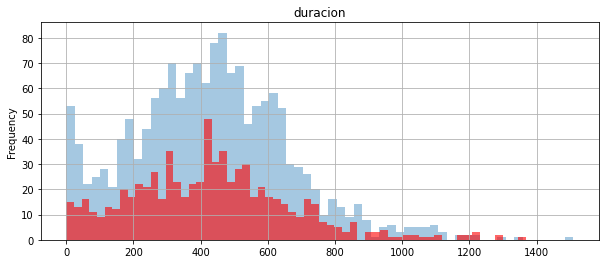

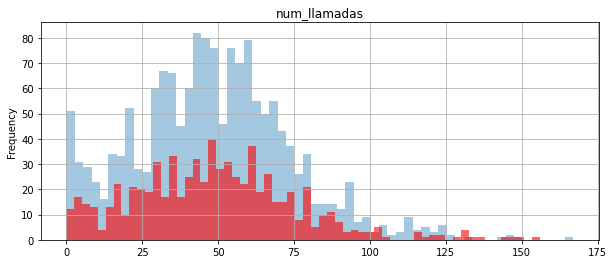

In [90]:
#hacer un bucle para graficar los histogramas de duración y número de llamadas
group_colum = ["duracion", "num_llamadas"]

for i in group_colum:
    data_usuario_completa_surf[i].plot(kind= "hist", grid=True, bins=60, figsize=(10,4), alpha=0.4, title=i, range=(data_usuario_completa_surf[i].min(), data_usuario_completa_surf[i].max()))
    data_usuario_completa_ultimate[i].plot(kind= "hist", grid=True, bins=60, figsize=(10,4), alpha=0.6, color="red", title=i, range=(data_usuario_completa_ultimate[i].min(), data_usuario_completa_ultimate[i].max()))
    plt.show()

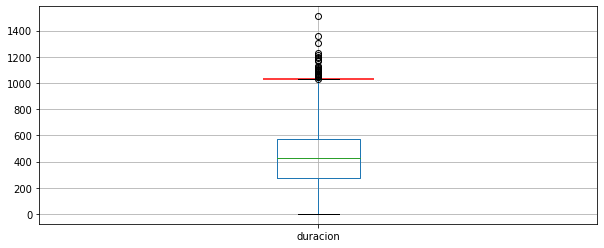

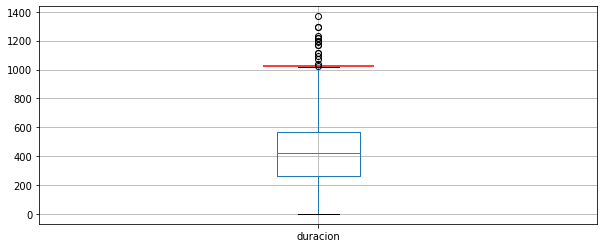

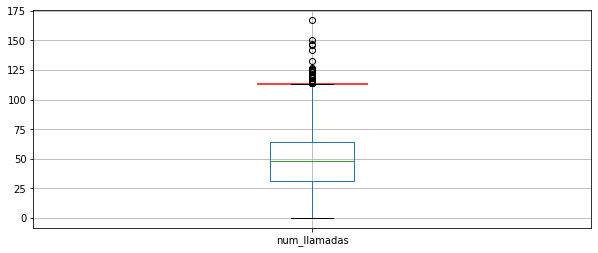

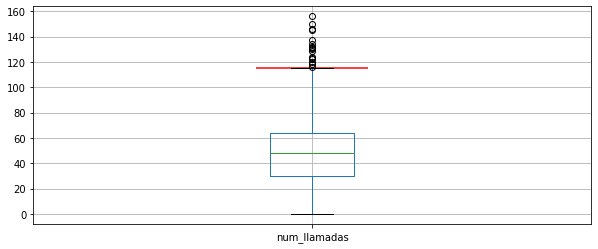

In [99]:
# bucle para generar boxplot

group_colum = ["duracion", "num_llamadas"]

for i in group_colum:
    Q1=data_usuario_completa_surf[i].quantile(0.25)
    Q3=data_usuario_completa_surf[i].quantile(0.75)
    IQR=Q3-Q1
    data_usuario_completa_surf.boxplot(i, figsize=(10,4))
    plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
    plt.show()
    Q1_1=data_usuario_completa_ultimate[i].quantile(0.25)
    Q3_3=data_usuario_completa_ultimate[i].quantile(0.75)
    IQR=Q3_3-Q1_1
    data_usuario_completa_ultimate.boxplot(i, figsize=(10,4))
    plt.hlines(y=Q3_3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
    plt.show()

Analizando los histogramas, se observa:
- Para el plan surf, la mayor concentración de los datos se encuentra entre los 300 y 580 minutos, con una cola a la derecha que provoca un sesgo positivo (media > mediana), hay un pico alrededor de los 0 minutos que representan usuarios que no realizan llamadas y hay valores atípicos por encima de los 1000 min (se confirma en el boxplot) que forman la cola, con pocos datos, a la derecha del histograma.
- Para el plan ultimate hay un pico alrededor de la mediana y los datos se concentran entre los 250 y 580 minutos. Igualmente se observa una cola a la derecha con valores atípicos por encima de los 1000 minutos (boxplot).
- Comparando ambos histogramas se evidencia que en el plan ultimate la distribución de la duración de las llamadas es más uniforme con menos picos, la cantidad de usuarios del plan surf supera considerablemente la del plan ultimate y ambas distribuciones muestran comportamiento similar con un sesgo positivo y datos a la derecha con valores atípicos por encima de los 1000 minutos. En los boxplot se corroboran los valores atípicos en ambos planes y se muestra que a pesar del sesgo, la cantidad de datos se concentra de manera pareja entre el primer y tercer cuartil (la mediana está casi a la mitad de la caja).
- En el histograma del número de llamadas, se observa que los usuarios que contrataron el plan surf superan en el número de llamadas a los clientes de ultimate, definitivamente llaman más y de allí que se excedan en los minutos libres. Ambos histogramas, al igual que en la duración de las llamadas, presentan el mismo comportamiento con sesgo positivo y valores atípicos por encima de los 115 min aproximadamente.

<AxesSubplot:xlabel='user_id'>

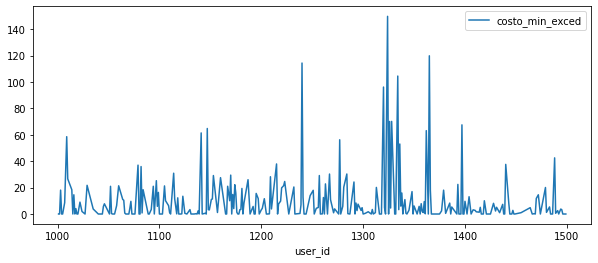

In [100]:
#filtro para checar por usuario cuantos sobrepasan el costo del paquete surf por año
data_usuario_completa_surf.query('costo_total_mensual > 20').pivot_table(index=["user_id"], values=["costo_min_exced"], aggfunc="sum").plot(figsize=(10,4))

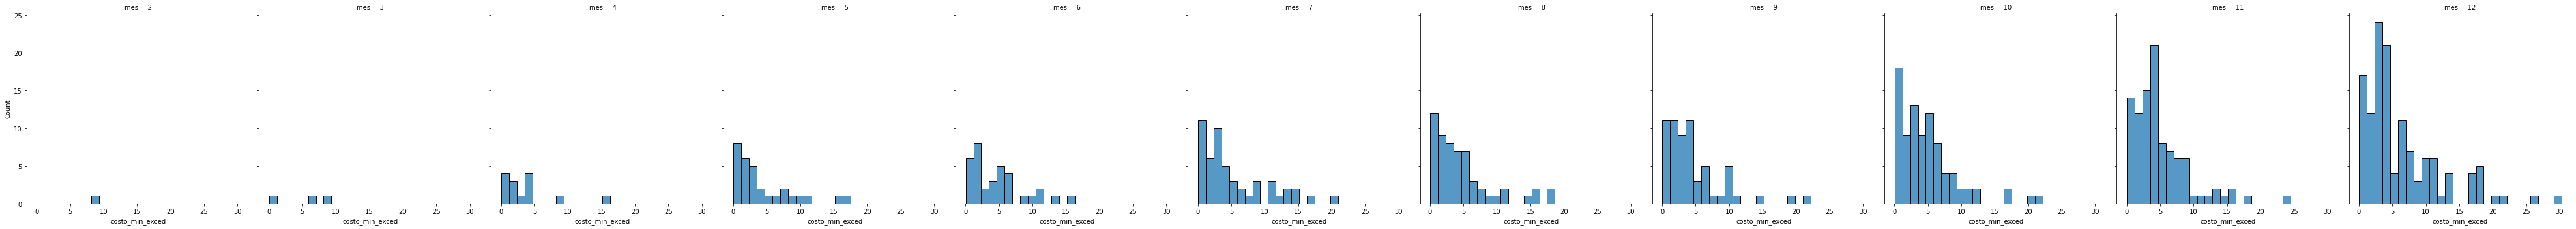

In [101]:
#gráfica de distribución de costo por minutos excedidos en el plan surf
x_minutos=data_usuario_completa_surf.query('costo_min_exced >0')
sns.displot(data=x_minutos, x="costo_min_exced", col="mes")
plt.show()

Con esta gráfica se observa como se incrementa mensualmente el ingreso por minutos excedidos, esto puede deberse a que se incorporan mayor cantidad de usuarios al plan que también se exceden en los minutos, adicionalmente se aprecia como se van incorporando datos a la derecha de la curva creando el sesgo positivo con concentración mayor de datos en los primeros valores.

<AxesSubplot:xlabel='mes'>

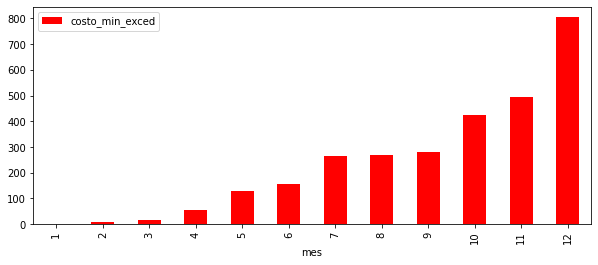

In [102]:
data_usuario_completa_surf.pivot_table(index="mes", values="costo_min_exced", aggfunc="sum").plot(kind="bar", figsize=(10,4), color="red")

<AxesSubplot:>

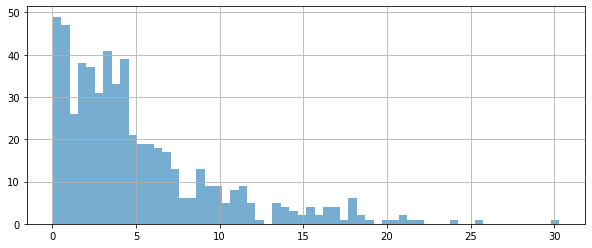

In [105]:
#histograma para el costo pagado en exceso por minutos en ambos planes
data_usuario_completa_surf.query('costo_min_exced>0')["costo_min_exced"].hist(bins=60, figsize=(10,4), alpha=0.6)
data_usuario_completa_ultimate.query('costo_min_exced>0')["costo_min_exced"].hist(bins=60, figsize=(10,4), color="red", alpha=0.6)

En el histograma para el plan surf y costos excedidos por minutos, se observa que la mayor cantidad de datos está entre 0 y 4 minutos, seguido por una considerable cantidad de datos entre los 4 y 8 minutos, con una cola de valores a la derecha de poca frecuencia, provocando un sesgo positivo. Para el plan ultimate no hay costo por minutos excedidos.

(0.0, 0.04)

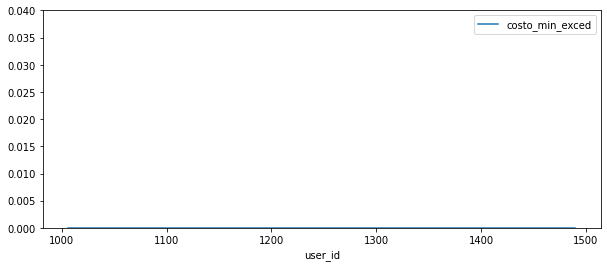

In [106]:
#filtro para checar por usuario cuantos sobrepasan el costo del paquete surf
data_usuario_completa_ultimate.query('costo_total_mensual > 70').pivot_table(index=["user_id"], values=["costo_min_exced"], aggfunc="sum").plot(figsize=(10,4))
plt.ylim(0,0.04)

Conclusiones para los minutos consumidos por llamadas:

Los resultados obtenidos para los minutos utilizados por los usuarios que tienen contratado el plan surf muestran:
- La media oscila por los 429 min y los minutos gratis del plan son 500. La mediana es de 425, por lo que al menos un poco más de la mitad de los usuarios no pagan por exceso de minutos.
- Pocos usuarios pagan más del costo del plan por concepto de minutos en exceso.
- En los tres primeros meses del año, casi no hay ingresos por minutos excedidos, ya a partir del mes 4 Megaline alcanza a percibir por este concepto, valores cercanos al monto del plan ultimate y de allí se superan los 100 usd, alcanzándose en diciembre el máximo aproximado de 800 usd. El ingreso para Megaline es creciente por mes debido a que muy probablemente se incorporan más clientes a medida que avanzaba el año.
- La mayor cantidad de minutos excedidos por usuario se concentra en menos de 8 min, lo cual no representa una cantidad considerable en dólares por este concepto para cada cliente.

Los resultados para el plan ultimate:
- La media oscila por los 430 min, con una mediana de 424 min. Estos valores están muy por debajo de los minutos gratis contemplados en el plan (3000).
- No hay minutos excedidos en este plan, ni siquiera el máximo (1369 min) sobrepasa los minutos gratis, por lo que no hay pagos por excederse de los minutos contemplados en el plan.
- Es posible que a ciertos usuarios que no hablen mucho les convenga el plan surf, sin embargo, hay que checar que además de que no hablen mucho tampoco naveguen en internet mucho.

### Histogramas y análisis de mensajes

<AxesSubplot:>

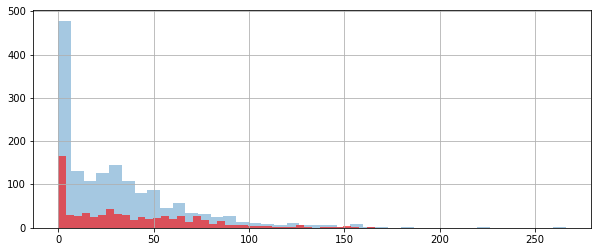

In [107]:
data_usuario_completa_surf["message_date"].hist(bins=40, figsize=(10,4), alpha=0.4)
data_usuario_completa_ultimate["message_date"].hist(bins=40, figsize=(10,4), color="red", alpha=0.6)

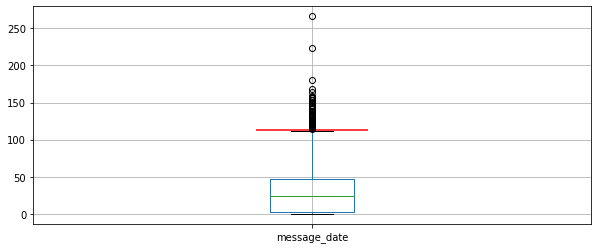

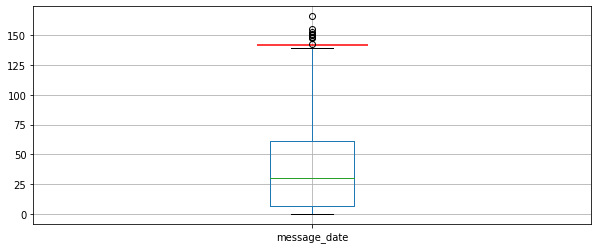

In [186]:
Q1=data_usuario_completa_surf["message_date"].quantile(0.25)
Q3=data_usuario_completa_surf["message_date"].quantile(0.75)
IQR=Q3-Q1
data_usuario_completa_surf.boxplot("message_date", figsize=(10,4))
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
plt.show()
Q1_1=data_usuario_completa_ultimate["message_date"].quantile(0.25)
Q3_3=data_usuario_completa_ultimate["message_date"].quantile(0.75)
IQR=Q3_3-Q1_1
data_usuario_completa_ultimate.boxplot("message_date", figsize=(10,4))
plt.hlines(y=Q3_3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
plt.show()

Analizando los histogramas, se observa:

- Para el plan surf la mayor concentración de los datos se encuentra entre los 3 y 47 SMS, con un gran pico a los 0 SMS. Hay una asimetría positiva con datos a la derecha que provoca un sesgo positivo (media > mediana), igualmente se observan valores atípicos por encima de los 100 mensajes (se confirma en el boxplot) que forman la cola, con pocos datos a la derecha del histograma.
- Para el plan ultimate hay un fuerte pico alrededor de 0 y luego los valores se distribuyen homogeneamente entre 5 y 60 SMS. Igualmente se observa una cola a la derecha con valores atípicos por encima de los 140 SMS (boxplot).
- Comparando ambos histogramas se evidencia un comportamiento similar en las distribuciones con un fuerte pico a los 0 SMS (no hay mensajes) en los dos planes. En el plan ultimate la distribución de los mensajes es más uniforme y la cantidad de usuarios del plan surf supera considerablemente la del plan ultimate. Hay asimetría positiva en ambos histogramas con un sesgo positivo y datos a la derecha con valores atípicos por encima de los 100 para surf y 140 SMS para ultimate. En los boxplot se corroboran los valores atípicos en ambos planes y se muestra que a pesar del sesgo, la cantidad de datos se concentra de manera pareja entre el primer y tercer cuartil (la mediana está casi a la mitad de la caja) en el plan surf y en el plan ultimate se aprecia una ligera concentración mayor de datos en el tercer cuartil.


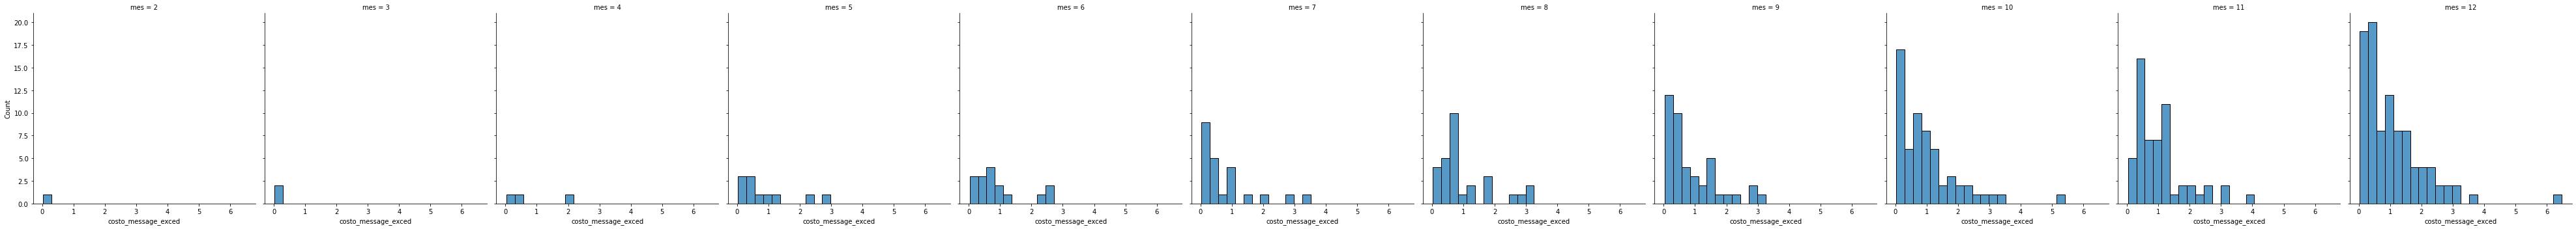

In [111]:
x_message=data_usuario_completa_surf.query('costo_message_exced>0')
sns.displot(data=x_message, x="costo_message_exced", col="mes")
plt.show()

Con esta gráfica se observa como se incrementa mensualmente el ingreso por SMS excedidos para el plan surf, esto puede deberse a que se incorporan mayor cantidad de usuarios al plan que también se exceden en los mensajes, adicionalmente se observa como se van incorporando datos a la derecha de curva creando el sesgo y se concentran más datos en los primeros valores.

<AxesSubplot:xlabel='mes'>

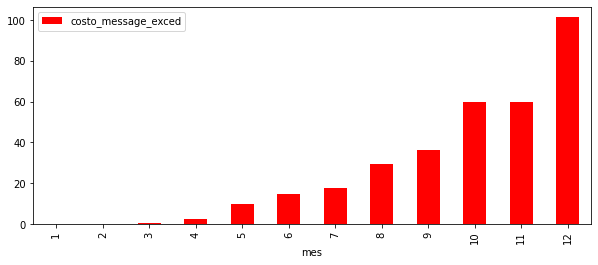

In [112]:
#calculo de ingreso mensual por exceso de SMS plan surf
data_usuario_completa_surf.pivot_table(index="mes", values="costo_message_exced", aggfunc="sum").plot(kind="bar", figsize=(10,4), color="red")

<AxesSubplot:xlabel='user_id'>

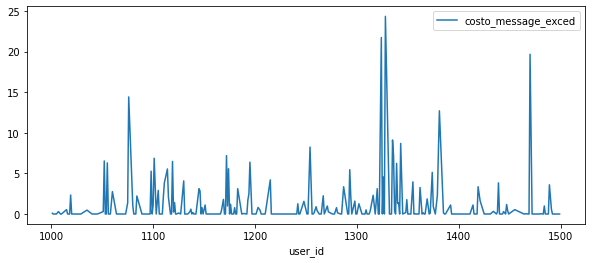

In [113]:
data_usuario_completa_surf.query('costo_total_mensual > 20').pivot_table(index=["user_id"], values=["costo_message_exced"], aggfunc="sum").plot(figsize=(10,4))

(0.0, 0.02)

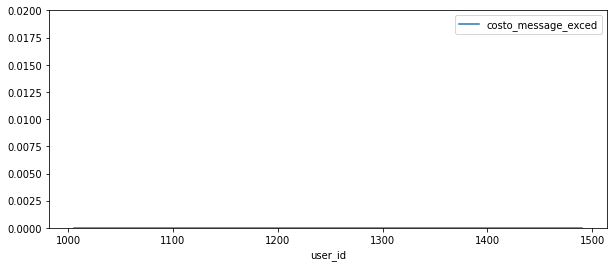

In [116]:
data_usuario_completa_ultimate.query('costo_total_mensual > 70').pivot_table(index=["user_id"], values=["costo_message_exced"], aggfunc="sum").plot(figsize=(10,4))
plt.ylim(0,0.02)

<AxesSubplot:>

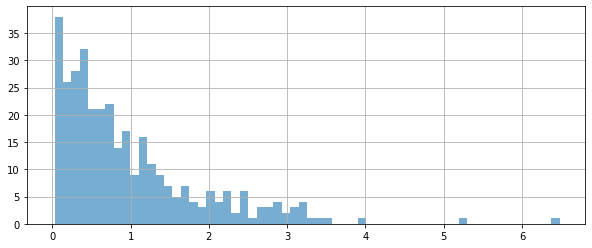

In [115]:
#Histograma de ingresos por mensajes excedidos por plan
data_usuario_completa_surf.query('costo_message_exced>0')["costo_message_exced"].hist(bins=60, figsize=(10,4), alpha=0.6)
data_usuario_completa_ultimate.query('costo_message_exced>0')["costo_message_exced"].hist(bins=60, figsize=(10,4), color="red", alpha=0.6)

Conclusiones para los mensajes consumidos por plan:

Los resultados obtenidos para los mensajes enviados por los usuarios que tienen contratado el plan surf muestran:
- La media oscila por los 31 mensajes y los permitidos sin costo por el plan son de 50. La mediana es de 24, por lo que al menos más de la mitad y del tercer cuartil de los usuarios no pagan por exceso de mensajes.
- Pocos usuarios pagan más del costo del plan por concepto de mensajes en exceso (anual).
- La mayor cantidad de mensajes excedidos es menor que 2 usd por lo que esto no impacta el monto de pago del plan mensual.
- En el mes de diciembre Megaline recibió el máximo ingreso por el concepto de exceso de SMS y en Marzo fue el mínimo percibido.

Los resultados para el plan ultimate:
- La media oscila por los 38 mensajes, con una mediana de 30 mensajes. Estos valores están muy por debajo de los SMS comprendidos en el plan (1000), ni siquiera el máximo lo alcanza.
- No hay SMS excedidos en este plan, por lo que no hay pagos por excederse de los mensajes contemplados en el plan.
- Es posible que a ciertos usuarios que no texteen mucho les convenga el plan surf, sin embargo, hay que checar que además de que no hablen mucho, ni texteen mucho, tampoco naveguen en internet mucho.

### Histogramas y análisis de datos en internet

<AxesSubplot:>

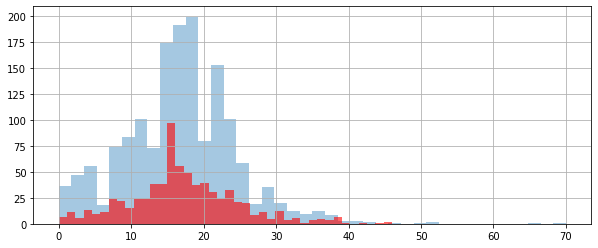

In [117]:
#histogramas para el volumen de GB consumidos por mes en ambos planes
data_usuario_completa_surf["volumen_datos_mes_gb"].hist(bins=40, figsize=(10,4), alpha=0.4)
data_usuario_completa_ultimate["volumen_datos_mes_gb"].hist(bins=40, figsize=(10,4), color="red", alpha=0.6)

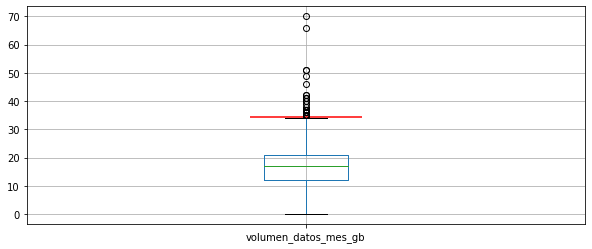

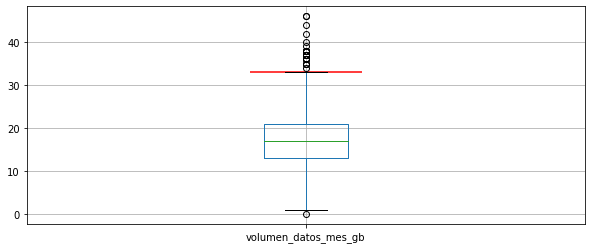

In [120]:
Q1=data_usuario_completa_surf["volumen_datos_mes_gb"].quantile(0.25)
Q3=data_usuario_completa_surf["volumen_datos_mes_gb"].quantile(0.75)
IQR=Q3-Q1
data_usuario_completa_surf.boxplot("volumen_datos_mes_gb", figsize=(10,4))
plt.hlines(y=Q3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
plt.show()
Q1_1=data_usuario_completa_ultimate["volumen_datos_mes_gb"].quantile(0.25)
Q3_3=data_usuario_completa_ultimate["volumen_datos_mes_gb"].quantile(0.75)
IQR=Q3_3-Q1_1
data_usuario_completa_ultimate.boxplot("volumen_datos_mes_gb", figsize=(10,4))
plt.hlines(y=Q3_3+1.5*IQR, xmin=0.9, xmax=1.1, color="red")
plt.show()

Analizando los histogramas, se observa:

- Para el plan surf, hay un fuerte pico entre 12 y 17 GB, apareciendo un segundo pico en la región comprendida entre 21 y 26 GB. Apartando estos picos la mayor concentración de los datos se encuentra entre los 8 y 25 GB, con una cola a la derecha que provoca un cierto sesgo positivo (media > mediana). Adicionalmete se puede notar un pico menor entre los 0 y 5 GB, hay valores atípicos por encima de los 35 GB (se confirma en el boxplot) que forman la cola, con pocos datos, a la derecha del histograma.
- Para el plan ultimate hay un pico muy marcado alrededor los 15 GB y los datos se concentran entre los 13 y 21 GB. Igualmente se observa una cola a la derecha con valores atípicos por encima de los 32 GB (boxplot).
- Comparando ambos histogramas se evidencia que en el plan ultimate la distribución de la duración de GB es más uniforme con un solo pico bien marcado, la cantidad de usuarios del plan surf supera considerablemente la del plan ultimate y ambas distribuciones muestran comportamientos similares con un sesgo positivo y datos a la derecha con valores atípicos.
- En los boxplot se corroboran los valores atípicos en ambos planes y se muestra que para el plan ultimate la mediana esta justo a la mitad del primer y tercer cuartil, es decir, la mayor cantidad de datos se concentra equitativamente en este rango, mientras que para los usuarios del plan surf la mayor cantidad de datos está concentrada entre el primer cuartil y la mediana. Los valores máximos alcanzados en el plan surf superan por más de la mitad al valor máximo de ultimate. 


<AxesSubplot:xlabel='user_id'>

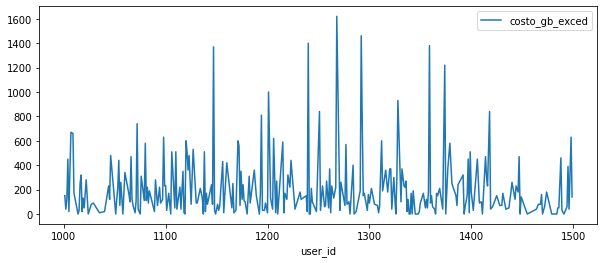

In [121]:
data_usuario_completa_surf.query('costo_total_mensual > 20').pivot_table(index=["user_id"], values=["costo_gb_exced"], aggfunc="sum").plot(figsize=(10,4))

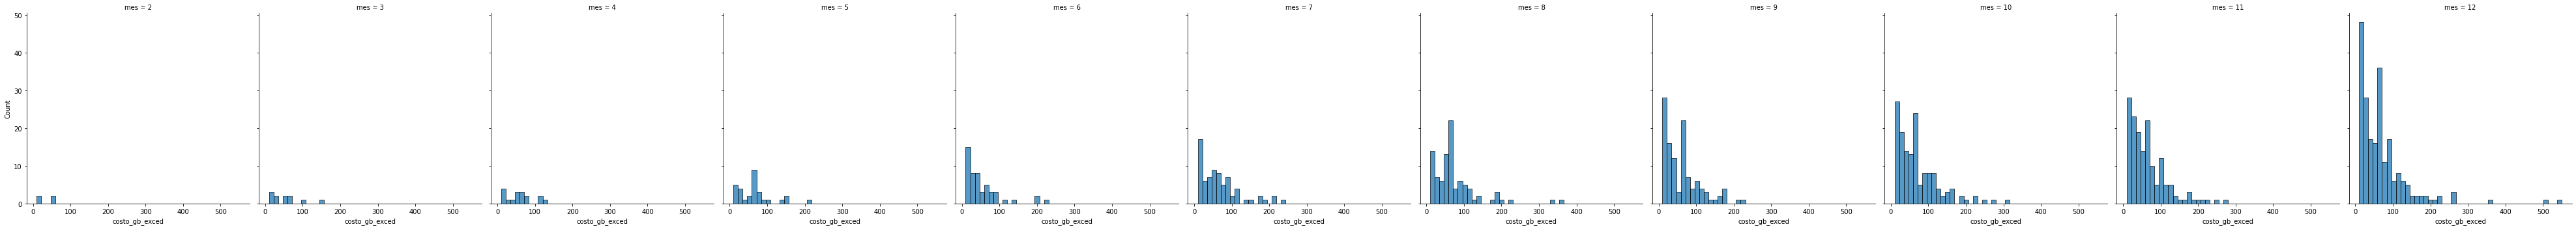

In [122]:
x_gb=data_usuario_completa_surf.query('costo_gb_exced>0')
sns.displot(data=x_gb, x="costo_gb_exced", col="mes")
plt.show()

Con esta gráfica se observa como se incrementa mensualmente el ingreso por GB excedidos para el plan surf, esto puede deberse a que se incorporan mayor cantidad de usuarios al plan que también se exceden en los GB, adicionalmente se observa como se van incorporando datos a la derecha de curva creando el sesgo positivo con concentración más datos en los primeros valores.

<AxesSubplot:xlabel='mes'>

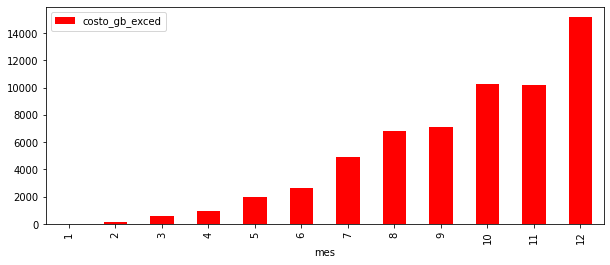

In [123]:
data_usuario_completa_surf.pivot_table(index="mes", values="costo_gb_exced", aggfunc="sum").plot(kind="bar", figsize=(10,4), color="red")

<AxesSubplot:xlabel='user_id'>

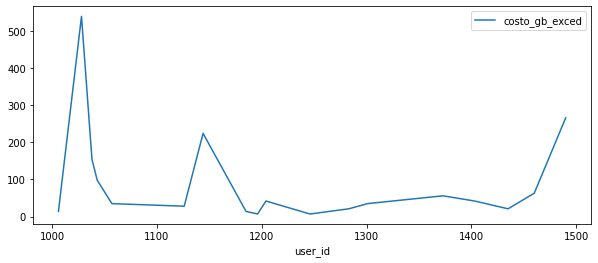

In [124]:
data_usuario_completa_ultimate.query('costo_total_mensual > 70').pivot_table(index=["user_id"], values=["costo_gb_exced"], aggfunc="sum").plot(figsize=(10,4))

<AxesSubplot:>

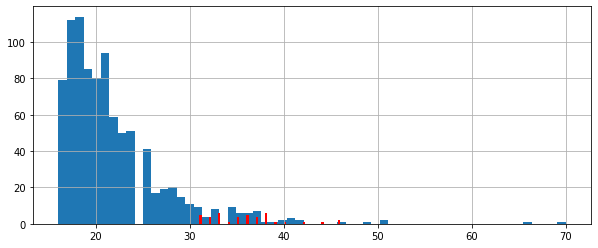

In [125]:
#histograma de volumen de datos excedidos de los gratis contemplados en los planes
data_usuario_completa_surf.query('volumen_datos_mes_gb>15')["volumen_datos_mes_gb"].hist(bins=60, figsize=(10,4))
data_usuario_completa_ultimate.query('volumen_datos_mes_gb>30')["volumen_datos_mes_gb"].hist(bins=60, figsize=(10,4), color="red")

<AxesSubplot:>

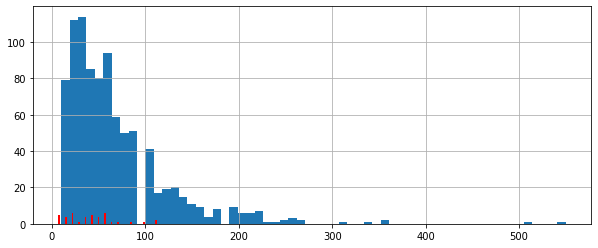

In [126]:
#histograma de los costos por exceso de GB 
data_usuario_completa_surf.query('costo_gb_exced>0')["costo_gb_exced"].hist(bins=60, figsize=(10,4))
data_usuario_completa_ultimate.query('costo_gb_exced>0')["costo_gb_exced"].hist(bins=60, figsize=(10,4), color="red")

<AxesSubplot:xlabel='mes'>

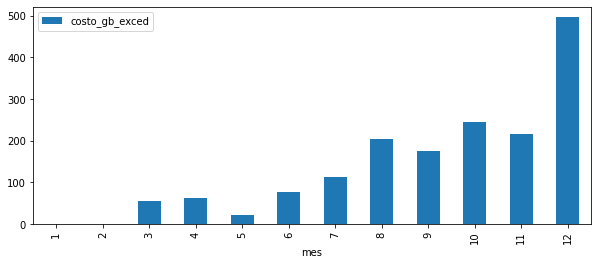

In [127]:
data_usuario_completa_ultimate.pivot_table(index="mes", values="costo_gb_exced", aggfunc="sum").plot(kind="bar", figsize=(10,4))

Conclusiones para los datos consumidos por plan:

Los resultados obtenidos para los gb o datos consumidos por los usuarios que tienen contratado el plan surf muestran:
- La media oscila por los 17 GB y los permitidos sin costo por el plan son de 15 GB. La mediana es de 17 GB, por lo que menos de la mitad de los usuarios no pagan por exceso de navegación en la internet.
- Hay usuarios pagan más del costo del plan por concepto de GB en exceso (anual).
- La mayor cantidad de GB excedidos es menor que 26 por lo que esto afecta considerablemente el monto de pago del plan mensual, ya que por ejemplo, para un usuario que consuma 20 GB en exceso en el mes tendría que pagar más de 200 usd. Probablemente para estos usuarios es más conveniente cambiarse de plan para pagar menos y migrar al plan Ultimate.
-Megaline percibe el mayor ingreso por concepto de exceso de GB consumidos en el mes de Diciembre superando los 14000 usd, buenos números por concepto de excedente.

Los resultados para el plan ultimate:
- La media y la mediana oscila por los 17 GB. Estos valores están muy por debajo de los GB comprendidos en el plan (30).
- Hay pocos usuarios que se exceden de los 30 GB.
- Es posible que a ciertos usuarios que no naveguen mucho les convenga el plan surf que contempla 15 GB, es decir, a un poco menos de la mitad de los usuarios que contrataron este plan les conviene cambiarse al plan surf ya que además de no sobrepasar los GB de surf, no alcanzan a sobrepasar ni los SMS ni los minutos consumidos, y en el peor escenario que sobrepasen los minutos el costo por excederse sería bajo.
-El mayor ingreso para Megaline por concepto de GB excedido por usuario y por mes se da en Diciembre, mes en el que tiene mayor cantidad de usuarios y tambien será porque muchas personas se conectan con sus familiares por las fiestas?? o para comprar los regalos navideños en línea???, como sea para Megaline es el mejor mes del año....

In [128]:
#filtro para un usuario en particular
data_usuario_completa_surf.query('user_id==1292').pivot_table(index=["user_id", "first_name", "last_name", "age", "mes", "plan"], values=["volumen_datos_mes_gb", "costo_gb_exced", "costo_min_exced", "costo_message_exced", "costo_total_mensual"], aggfunc="sum")


costo_gb_exced  \
user_id first_name last_name age mes plan                   
1292    Cassey     French    42  7   surf              60   
                                 8   surf             360   
                                 9   surf             180   
                                 10  surf             310   
                                 11  surf             190   
                                 12  surf             360   

                                           costo_message_exced  \
user_id first_name last_name age mes plan                        
1292    Cassey     French    42  7   surf                  0.0   
                                 8   surf                  0.0   
                                 9   surf                  0.0   
                                 10  surf                  0.0   
                                 11  surf                  0.0   
                                 12  surf                  0.0   

                                           costo_min_exced  \
user_id first_name last_name age mes plan                    
1292    Cassey     French    42  7   surf              0.0   
                                 8   surf              0.0   
                                 9   surf              0.0   
                                 10  surf              0.0   
                                 11  surf              0.0   
                                 12  surf              0.0   

                                           costo_total_mensual  \
user_id first_name last_name age mes plan                        
1292    Cassey     French    42  7   surf                 80.0   
                                 8   surf                380.0   
                                 9   surf                200.0   
                                 10  surf                330.0   
                                 11  surf                210.0   
                                 12  surf                380.0   

                                           volumen_datos_mes_gb  
user_id first_name last_name age mes plan                        
1292    Cassey     French    42  7   surf                    21  
                                 8   surf                    51  
                                 9   surf                    33  
                                 10  surf                    46  
                                 11  surf                    34  
                                 12  surf                    51

A modo de ejemplo, se hizo un filtro para el usuario "Cassey French (1292)" y se encontró que mensualmente paga un exceso en la tarifa surf por concepto de GB excedido(solo en el mes de julio no se excedió, probablemente contrató el plan en ese mes a mediados o finales), si en lugar de contratar el plan surf, este cliente se cambiara al plan ultimate, en el mes 7 ya no hubiese pagado por exceso, aunque si 10 usd más por el plan, en el mes 8 solo hubiese pagado 147 usd por exceso que sumado a los 70 usd del plan llegaría a 217 usd, lo que significa un ahorro sustancial de 143 usd, nada mal!!!!. Esto corrobora que para clientes de este tipo convendría más contratar el plan ultimate.

<AxesSubplot:>

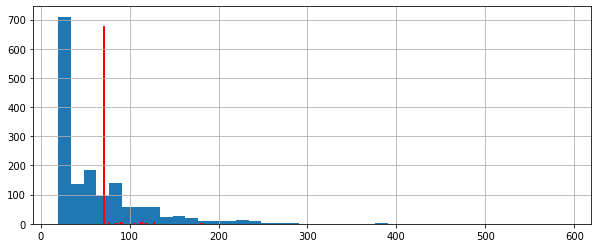

In [129]:
#histograma para el costo total a pagar mensualmente por plan
data_usuario_completa_surf["costo_total_mensual"].hist(bins=40, figsize=(10,4))
data_usuario_completa_ultimate["costo_total_mensual"].hist(bins=40, figsize=(10,4), color="red")

<AxesSubplot:xlabel='mes'>

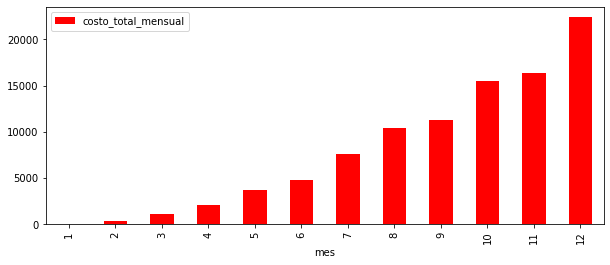

In [130]:
data_usuario_completa_surf.pivot_table(index="mes", values="costo_total_mensual", aggfunc="sum").plot(kind="bar", figsize=(10,4), color="red")

<AxesSubplot:xlabel='mes'>

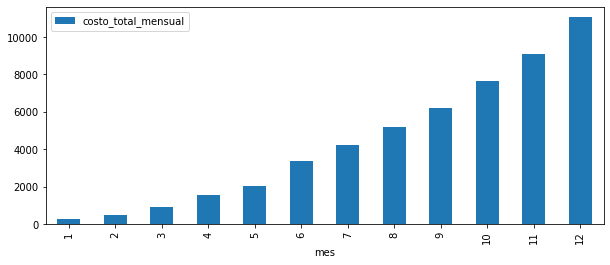

In [131]:
data_usuario_completa_ultimate.pivot_table(index="mes", values="costo_total_mensual", aggfunc="sum").plot(kind="bar", figsize=(10,4))

Al analizar el costo total que se paga mensualmente, se observa que para el plan surf la mayor frecuencia está alrededor de los 20 a 30 usd, con una concentración considerable entre 30 a 80 usd. También hay datos por encima de los 100 usd. Caso contrario para los usuarios del plan ultimate que muestra un pico en los 70 usd y muy pocos valores a un rango mayor. Definitivamente en los datos del plan surf la distribución tiene un sesgo positivo hacia la derecha con la media mayor que la mediana, para nada se distribuye "normal", y para los clientes que contrataron el plan ultimate la distribución está centrada en los 70 usd. Esto era de esperarse al ver la diferencia considerable entre la desviación standard y la varianza de los dos planes.
A partir del segundo semestre del año, se incrementan considerablemente los ingresos para Megaline, siendo Diciembre, definitivamente el mejor mes, por cuanto percibe la mayor cantidad de dinero y más por el concepto de exceso de gb, viva la navidad.

### Cálculo de la normalidad de los datos

In [132]:
#determinación de normalidad de las variables estudiadas en el plan surf método D'Agostino Pearson
columnas_estudio=["duracion","message_date", "volumen_datos_mes_gb", "costo_total_mensual"]
for i in columnas_estudio:
    k2, p_value = st.normaltest(data_usuario_completa_surf[i])
    if (p_value < 0.05 ):
        print (f"columna {i} no sigue una distribución normal, p_value = {p_value}, estadístico = {k2}")

columna duracion no sigue una distribución normal, p_value = 3.347926877275808e-16, estadístico = 71.26604035246822
columna message_date no sigue una distribución normal, p_value = 2.6982226530535246e-112, estadístico = 513.7938742714578
columna volumen_datos_mes_gb no sigue una distribución normal, p_value = 2.154520591118278e-43, estadístico = 196.48718152691026
columna costo_total_mensual no sigue una distribución normal, p_value = 1.9456314541752358e-206, estadístico = 947.3338851545782


In [133]:
#determinación de normalidad de las variables estudiadas en el plan ultimate método D'Agostino Pearson
columnas_estudio=["duracion","message_date", "volumen_datos_mes_gb", "costo_total_mensual"]
for i in columnas_estudio:
    k2, p_value = st.normaltest(data_usuario_completa_ultimate[i])
    if (p_value < 0.05 ):
        print (f"columna {i} no sigue una distribución normal, p_value = {p_value}, estadístico = {k2}")

columna duracion no sigue una distribución normal, p_value = 1.719567704535085e-13, estadístico = 58.78306656851937
columna message_date no sigue una distribución normal, p_value = 3.067462420385841e-20, estadístico = 89.86170242649197
columna volumen_datos_mes_gb no sigue una distribución normal, p_value = 1.094720375836198e-09, estadístico = 41.26553374164435
columna costo_total_mensual no sigue una distribución normal, p_value = 8.117349846702718e-187, estadístico = 856.9788173250863


#### Distribución normal duración de llamadas

In [134]:
datos=data_usuario_completa_surf["duracion"]
datos1=data_usuario_completa_ultimate["duracion"]

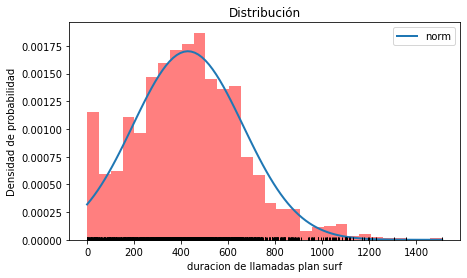

In [135]:
#gráfica de distribución normal para los datos de duración de llamadas en el plan surf
distribucion = st.norm
parametros = distribucion.fit(data=datos)
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)
#print(aic, bic)
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('duracion de llamadas plan surf')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();


In [136]:
print(aic, bic)

21635.506992536633 21646.22847234275


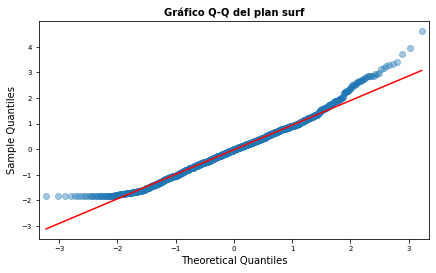

In [137]:
#gráfico de cuantiles para duración de llamadas plan Surf
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del plan surf', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

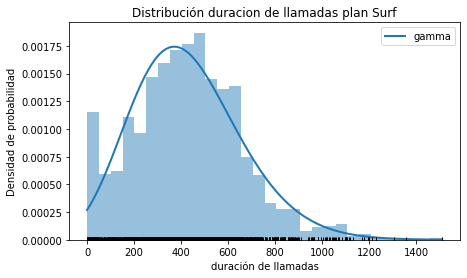

In [138]:
#cálculo para distribución gamma
distribucion = st.gamma
parametros = distribucion.fit(data=datos)
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución duracion de llamadas plan Surf')
ax.set_xlabel('duración de llamadas')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [139]:
print(aic,bic)

21578.70323986434 21594.785459573515


La métrica aic y bic para la distribución gamma es menor que la de la distribución normal por lo que los datos se aproximan más a una distribución gamma.

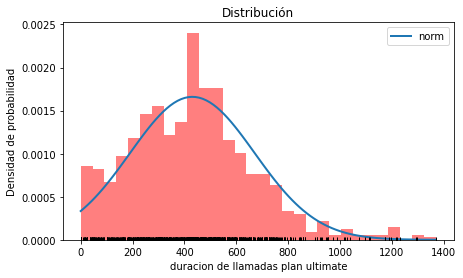

In [140]:
#gráfica de distribución normal para los datos de duración de llamadas en el plan ultimate
distribucion = st.norm
parametros = distribucion.fit(data=datos1)
x_hat = np.linspace(min(datos1), max(datos1), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos1.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos1.shape[0]) * len(parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos1, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos1, np.full_like(datos1, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('duracion de llamadas plan ultimate')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [141]:
print(aic, bic)

9941.440186076692 9950.598688500711


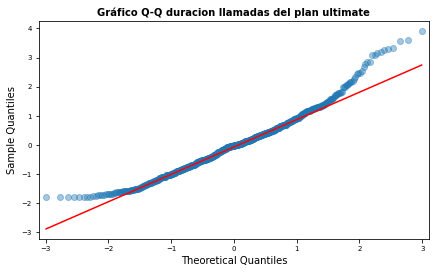

In [142]:
#gráfico de cuantiles para duración de llamadas en el plan ultimate
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos1,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q duracion llamadas del plan ultimate', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

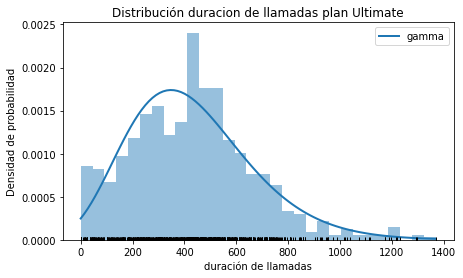

In [143]:
#cálculo para distribución gamma
distribucion = st.gamma
parametros = distribucion.fit(data=datos1)
x_hat = np.linspace(min(datos1), max(datos1), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos1.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos1.shape[0]) * len(parametros)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos1, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos1, np.full_like(datos1, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución duracion de llamadas plan Ultimate')
ax.set_xlabel('duración de llamadas')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [144]:
print(aic, bic)

9892.08721887031 9905.824972506342


Los gráficos de cuantiles y distribución de probabilidad, así como el cálculo de la normalidad por el método D'Agostino Pearson, muestran que la duración de las llamadas no se comporta de manera normal, se corrobora el sesgo positivo mostrado en el histograma. Cualquier hipótesis nula que se plantee de igualdad de promedio en la duración de las llamadas en los dos planes será rechazada. La distribución gamma presenta mejor ajuste a los datos, puesto que sus métricas aic y bic son menores.

#### Distribución normal GB consumidos

In [187]:
datos2=data_usuario_completa_surf["volumen_datos_mes_gb"]
datos3=data_usuario_completa_ultimate["volumen_datos_mes_gb"]

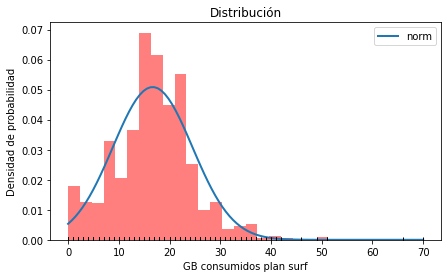

In [188]:
#gráfica de distribución normal para los GB consumidos en surf
distribucion = st.norm
parametros = distribucion.fit(data=datos2)
x_hat = np.linspace(min(datos2), max(datos2), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos2.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos2.shape[0]) * len(parametros)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos2, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos2, np.full_like(datos2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('GB consumidos plan surf')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [189]:
print(aic,bic)

10948.36258420177 10959.084064007886


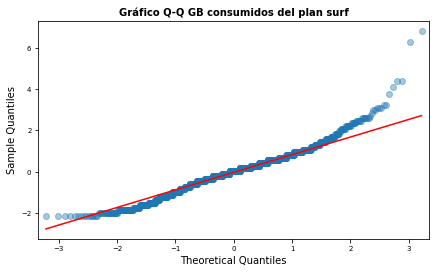

In [190]:
#cálculo de cuantiles para GB consumidos de usuarios del plan Surf
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos2,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q GB consumidos del plan surf', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

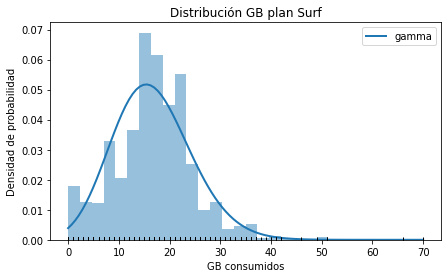

In [191]:
#cálculo para distribución gamma
distribucion = st.gamma
parametros = distribucion.fit(data=datos2)
x_hat = np.linspace(min(datos2), max(datos2), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos2.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos2.shape[0]) * len(parametros)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos2, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos2, np.full_like(datos2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución GB plan Surf')
ax.set_xlabel('GB consumidos')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [192]:
print(aic, bic)

10904.124318912662 10920.206538621836


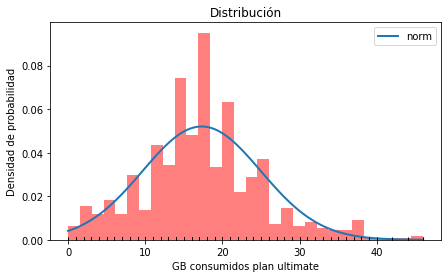

In [150]:
#gráfica de distribución normal para los GB consumidos en el plan ultimate
distribucion = st.norm
parametros = distribucion.fit(data=datos3)
x_hat = np.linspace(min(datos3), max(datos3), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos3.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos3.shape[0]) * len(parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos3, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos3, np.full_like(datos3, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('GB consumidos plan ultimate')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [151]:
print(aic,bic)

4980.026909814189 4989.185412238209


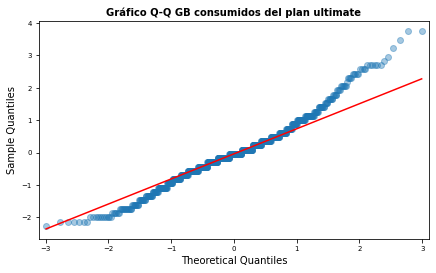

In [152]:
#gráfico de cuantiles para GB consumidos en el plan ultimate
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos3,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q GB consumidos del plan ultimate', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

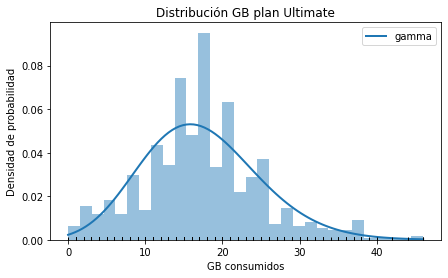

In [153]:
#cálculo para distribución gamma
distribucion = st.gamma
parametros = distribucion.fit(data=datos3)
x_hat = np.linspace(min(datos3), max(datos3), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
log_likelihood = distribucion.logpdf(datos3.to_numpy(), *parametros).sum()
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos3.shape[0]) * len(parametros)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos3, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos3, np.full_like(datos3, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución GB plan Ultimate')
ax.set_xlabel('GB consumidos')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [154]:
print(aic,bic)

4958.741194576687 4972.478948212717


Los gráficos de cuantiles y distribución de probabilidad, así como el cálculo de la normalidad por el método D'Agostino Pearson, muestran que los GB consumidos no se comporta de manera normal, se corrobora el sesgo positivo mostrado en el histograma. La distribución gamma se ajusta un poco mejor a estos datos por el valor menor obtenido en sus métricas.

#### Distribución normal costos totales

In [155]:
datos4=data_usuario_completa_surf["costo_total_mensual"]
datos5=data_usuario_completa_ultimate["costo_total_mensual"]

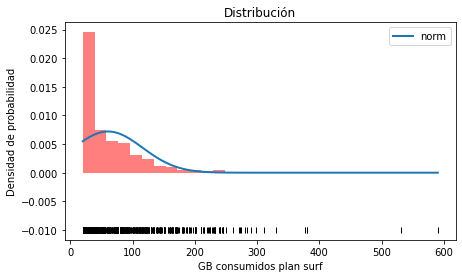

In [156]:
#gráfica de distribución normal para los costos totales en surf
distribucion = st.norm
parametros = distribucion.fit(data=datos4)
x_hat = np.linspace(min(datos4), max(datos4), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos4, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos4, np.full_like(datos4, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('GB consumidos plan surf')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

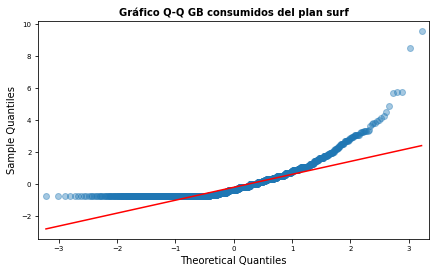

In [157]:
#cálculo de cuantiles para costos totales de usuarios del plan Surf
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos4,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q GB consumidos del plan surf', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

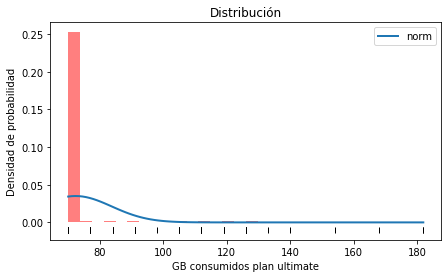

In [158]:
#gráfica de distribución normal para costos totales en el plan ultimate
distribucion = st.norm
parametros = distribucion.fit(data=datos5)
x_hat = np.linspace(min(datos5), max(datos5), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos5, density=True, bins=30, alpha=0.5, color="red")
ax.plot(datos5, np.full_like(datos5, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución')
ax.set_xlabel('GB consumidos plan ultimate')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

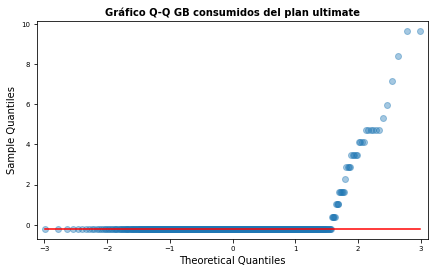

In [159]:
#gráfico de cuantiles para costos totales en el plan ultimate
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos5,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q GB consumidos del plan ultimate', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Los gráficos de cuantiles y distribución de probabilidad, así como el cálculo de la normalidad por el método D'Agostino Pearson, muestran que los ingresos mensuales no se comportan siguiendo una distribución normal, se corrobora el sesgo positivo mostrado en el histograma para el plan surf y en el caso del plan ultimate era obvio que no había distribución normal de los datos.

Para los mensajes enviados no se hicieron las gráficas porque es muy evidente el sesgo positivo lo cual lo aleja de la distribución normal y se corrobora con el análisis de normalidad según D'Agostino Pearson.

Conclusión:
-Ninguno de las variables analizadas: duración de llamadas, GB utilizados, mensajes enviados, costos o ingresos mensuales se comportan siguiendo una distribución normal, para ello se hicieron cálculos de normalidad, gráficas de distribución de probalidad y cuantiles, así como sus histogramas y cálculos estadísticos. La distribución gamma muestra un mejor ajuste a los datos en las variables duración de llamdas y GB consumidos.

## Hipótesis

Para continuar con el análisis de los datos, se porcederá al planteamiento de dos hipótesis referenciadas al ingreso promedio de los usuarios. 

### Hipótesis sobre el ingreso promedio de los usuarios de las tarifas Surf y Ultimate.

Para ello se planteo como:

1. Hipótesis Nula: La media de los ingresos por tarifa Surf es igual a la media de los ingresos por tarifa Ultimate.
2. Hipótesis alternativa: La media de los ingresos por tarifa Surf difiere a la media de los ingresos por tarifa Ultimate.

De acuerdo a los parámetros estadísticos determinados, las varianzas difieren entre las dos muestras por lo que se coloca equal_var = False

In [173]:
alpha=0.05
#hipótesis nula: Las varianzas poblacionales son iguales
stat, p = levene(data_usuario_completa_surf["costo_total_mensual"],data_usuario_completa_ultimate["costo_total_mensual"])
print(p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

5.028876110654919e-83
Rechazamos la hipótesis nula


El valor tan pequeño de p (menor al nivel de significación de 0.05), sugiere que las varianzas no son iguales para las muestras poblacionales.

In [162]:
#cálculo de la probabilidad para comprobar hipótesis nula
sample1=data_usuario_completa_surf["costo_total_mensual"]
sample2=data_usuario_completa_ultimate["costo_total_mensual"]
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  3.17039054811355e-15
Rechazamos la hipótesis nula


Con este resultado, se rechaza la hipótesis nula que establecía que ambas medias por ingresos de los 2 planes eran iguales.
De la tabla de parámetros estadísticos calculada en la sección 2, se tiene que la media de los ingresos provenientes por los usuarios que contrataron el plan surf difiere de la media de los ingresos provenientes por los usuarios que contrataron el plan ultimate, por lo que se rechaza la hipótesis nula y se acepta la alternativa.

### Hipótesis sobre el ingreso promedio de los usuarios NY-NJ


1. Hipótesis Nula: La media de los ingresos de los usuarios del área de New York - New Jersey es igual a la media de los ingresos de los usuarios de otras regiones.
2. Hipótesis alternativa: La media de los ingresos de los usuarios del área de New York - New Jersey difiere de la media de los ingresos de los usuarios de otras regiones.

In [165]:
#seccionamiento de la info por localización o región de contratación del plan
data_usuario_completa_ny = data_usuario_completa.query('city=="New York-Newark-Jersey City, NY-NJ-PA MSA"')
data_usuario_completa_otros = data_usuario_completa.query('city!="New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [166]:
#cálculo de la varianza para los usuarios de NY-NJ
data_usuario_completa_ny["costo_total_mensual"].var()

1895.5456899204246

In [167]:
#cálculo de la varianza para los usuarios de otras regiones
data_usuario_completa_otros["costo_total_mensual"].var()

2225.0479943518917

In [174]:
#prueba de Levene
alpha=0.05
#hipótesis nula: Las varianzas poblacionales son iguales
stat, p = levene(data_usuario_completa_ny["costo_total_mensual"],data_usuario_completa_otros["costo_total_mensual"])
print(p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

0.12580091109612837
No rechazamos la hipótesis nula


Con la prueba de Levene no se rechaza la hipótesis nula: Las varianzas poblacionales son iguales, por lo que se procede con la prueba t independientes con equal_var = True

In [175]:
#cálculo de probabilidad para comprobar hipótesis
sample3= data_usuario_completa_ny["costo_total_mensual"]
sample4= data_usuario_completa_otros["costo_total_mensual"]
alpha = 0.05
results2 = st.ttest_ind(sample3, sample4, equal_var=True) 
print('p-value: ', results2.pvalue)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.043557431621342436
Rechazamos la hipótesis nula


In [176]:
#calculo de datos estadísticos para usuarios de NY-NJ y otras regiones
def funcion_estadistica(df, df1, columna):
    p1 = df[columna].describe() 
    p2 = df1[columna].describe()
    d = pd.concat([p1, p2], axis=1)
    d.columns = ['ingresos_total_NY_NJ', 'ingresos_total_otras_regiones']
    return d

funcion_estadistica(data_usuario_completa_ny, data_usuario_completa_otros, "costo_total_mensual")

,ingresos_total_NY_NJ,ingresos_total_otras_regiones
count,377.000000,1916.000000
mean,59.921353,65.222771
std,43.537865,47.170414
min,20.000000,20.000000
25%,20.000000,24.927500
50%,51.770000,70.000000
75%,72.460000,70.000000
max,280.000000,590.370000


De acuerdo a los parámetros estadísticos:
-la media para los ingresos de los usuarios en el área New York - New Jersey difiere de la media de los ingresos de los usuarios de otras regiones.
El porcentaje de los usuarios de NY-NJ es del 16%.
-Las varianzas poblacionales son iguales entre los usuarios de NY-NJ y los de otras regiones. Caso contrario para las muestras poblacionales de los planes Surf y los planes Ultimate en donde estas varianzas si resultaron diferentes. 

### Cálculos finales

In [177]:
#tabla pivot para ingresos totales a Megaline, general, por surf y por ultimate
data_usuario_completa.pivot_table(index=["user_id", "mes", "plan"], values="costo_total_mensual", aggfunc="sum", margins=True)

costo_total_mensual
user_id mes plan                         
1000    12  ultimate                70.00
1001    8   surf                    20.00
        9   surf                    20.00
        10  surf                    90.09
        11  surf                    60.00
...                                   ...
1499    9   surf                    20.00
        10  surf                    70.00
        11  surf                    40.00
        12  surf                    90.00
All                             147557.18

[2294 rows x 1 columns]

In [185]:
data_usuario_completa_surf.pivot_table(index=["user_id", "mes", "plan"], values="costo_total_mensual", aggfunc=["sum", "mean"], margins=True)

sum                mean
                 costo_total_mensual costo_total_mensual
user_id mes plan                                        
1001    8   surf               20.00           20.000000
        9   surf               20.00           20.000000
        10  surf               90.09           90.090000
        11  surf               60.00           60.000000
        12  surf               60.00           60.000000
...                              ...                 ...
1499    9   surf               20.00           20.000000
        10  surf               70.00           70.000000
        11  surf               40.00           40.000000
        12  surf               90.00           90.000000
All                         95491.18           60.706408

[1574 rows x 2 columns]

In [179]:
#cálculo de porcentaje de ingresos por tarifa del plan surf
porc_surf=data_usuario_completa_surf["costo_total_mensual"].sum()/data_usuario_completa["costo_total_mensual"].sum()

print(f"Porcentaje de ingresos plan surf:{porc_surf:.0%}")

Porcentaje de ingresos plan surf:65%


In [184]:
data_usuario_completa_ultimate.pivot_table(index=["user_id", "mes", "plan"], values="costo_total_mensual", aggfunc=["sum", "mean"], margins=True)

sum                mean
                     costo_total_mensual costo_total_mensual
user_id mes plan                                            
1000    12  ultimate                70.0           70.000000
1006    11  ultimate                70.0           70.000000
        12  ultimate                84.0           84.000000
1008    10  ultimate                70.0           70.000000
        11  ultimate                70.0           70.000000
...                                  ...                 ...
1493    10  ultimate                70.0           70.000000
        11  ultimate                70.0           70.000000
        12  ultimate                70.0           70.000000
1497    12  ultimate                70.0           70.000000
All                              52066.0           72.313889

[721 rows x 2 columns]

In [181]:
porc_ultimate= data_usuario_completa_ultimate["costo_total_mensual"].sum()/data_usuario_completa["costo_total_mensual"].sum()

print(f"Porcentaje de ingresos plan ultimate:{porc_ultimate:.0%}")

Porcentaje de ingresos plan ultimate:35%


De acuerdo a las cifras arrojadas por los datos:
- Los usuarios que tienen contratado el plan Surf (69% de la muestra) han generado un ingreso de 95491.8, lo que representa el 65% total de los ingresos a la compañía.
- Los clientes que tienen contratado el plan Ultimate (31% de la muestra) han generado un ingreso de 52066 usd, es decir, el 35% de los ingresos totales.

In [182]:
data_usuario_completa_surf.pivot_table(index="user_id", values=["costo_message_exced", "costo_min_exced", "costo_gb_exced"], aggfunc="sum", margins=True)

,costo_gb_exced,costo_message_exced,costo_min_exced
user_id,,,
1001,150,0.09,0.00
1002,40,0.00,0.00
1003,120,0.00,18.12
1004,450,0.00,0.00
1005,20,0.00,0.00
...,...,...,...
1495,390,0.00,3.30
1496,40,0.00,0.00
1498,630,0.00,0.00


In [183]:
data_usuario_completa_ultimate.pivot_table(index="user_id", values=["costo_message_exced", "costo_min_exced", "costo_gb_exced"], aggfunc="sum", margins=True)

,costo_gb_exced,costo_message_exced,costo_min_exced
user_id,,,
1000,0,0.0,0.0
1006,14,0.0,0.0
1008,0,0.0,0.0
1011,0,0.0,0.0
1013,0,0.0,0.0
...,...,...,...
1487,0,0.0,0.0
1490,266,0.0,0.0
1493,0,0.0,0.0


- Los mayores ingresos por exceso se tienen en los clientes que contrataron el plan surf, especificamente por exceso de GB (64%), seguidos por los minutos (3%) y finalmente por los SMS (0.3%).
- En el plan ultimate, no hay una aportación considerable en los ingresos por concepto de exceso de GB (3%). No hay contribución por ningún otro rubro, solo el pago mensual de la renta del plan, es decir, los 70 usd.
- El plan surf tiene un promedio en ingreso (61 usd) menor que el promedio por ingreso del plan ultimate (72 usd).

## Conclusiones

Finalmente, después de hacer el análisis de los datos se concluye:

1. Después de juntar las tablas (calls, internet, message, plan y usuario) que contenían la información en una sola, se obtuvo un Dataframe con 500 usuarios o clientes diferentes, 2293 registros y 24 columnas.
2. Los datos ausentes que estaban en la data original (columna "churn_date" en usuario), fueron imputados con la palabra  "Activo" puesto que significaban que esos clientes aún mantenían relación comercial con Megaline.
3. No habían datos duplicados.
4. Los parámetros estadísticos muestran diferencia entre ellos, en la mayoría de los casos, la media supera a la mediana y los histogramas de las variables revelan un sesgo positivo hacia la derecha, por lo que no se comportan de acuerdo a una distribución normal. En el caso de los ingresos mensuales por cada plan se hace más notoria la diferencia entre la desviación standard y la varianza.
5. Los clientes que tienen contratado el plan Surf representan el 69% de los usuarios mientras que los de Ultimate son el 31%.
6. Los ingresos percibidos por los planes Surf y Ultimate son 95,491.18 usd (65%) y 52,066.00 usd (35%) respectivamente.
7. Los usuarios con el plan Surf pagaron más por excederse en los GB de internet (64% de los ingresos), minutos libres (3% de los ingresos) y SMS (0.3% de los ingresos).
8. Son pocos los usuarios del plan Ultimate que tuvieron que pagar un excedente por concepto de sobrepasar los GB permitidos (3% de los ingresos), ninguno en minutos y SMS libres o contemplados en el plan, de hecho consumen muy poco de los minutos libres (45%) y ni hablar de los SMS (solo consumen el 16% de lo permitido).
9. Diciembre es el mes en el que se perciben más ingresos por ambos planes.
10. Las distribuciones de las variables analizadas son asimétricas con sesgos positivos y ninguna se ajustó a la curva de distribución normal.
11. 16.4% de los datos corresponden a usuarios que contrataron los planes de Megaline en el área de New York - New Jersey y de estos el 82% tienen el plan Surf.
12. Se rechazaron las hipótesis nulas:
 - Los ingresos promedios de los usuarios de las tarifas Surf y Ultimate son iguales.
 - Los ingresos promedio de los usuarios en el área de New York - New Jersey son iguales a los de otras regiones.
13. Las varianzas poblacionales entre los usuarios con planes surf y ultimate son diferentes, de acuerdo a la prueba de Levene, mientrás que  la muestra poblacional de los usuarios que contraron en NY-NJ tiene varianza igual a la muestra poblacional de los usuarios que contrataron en otras regiones.
14. Megaline obtuvo más ganancias totales por los clientes con plan surf, debido a que estos representan el 69%.
14. Para Megaline sería más conveniente que sus clientes se cambiarán de plan puesto que Ultimate incluye más GB, minutos y SMS y el costo por GB, minutos y SMS excedidos es menor. Además los ingresos promedios de la tarifa Surf es menor a los ingresos promedios de la tarifa Ultimate, es decir, Megaline ganaría más si todos sus clientes contrataran el plan Ultimate.
